In [1]:
# import library if it is not installed
import sys
sys.path.insert(0, '../')

import mogptk
import numpy as np

%reload_ext autoreload
%autoreload 2

In [31]:
data = mogptk.Data()
#data.load_csv('data/jura.csv', ['X', 'Y'], ['Cd'])#, 'Cu'])
#data.remove_range('Cd', start=2.0, end=None)
#data.remove_randomly('Cd', pct=0.90)

data.add_function(lambda x: np.sin(6*x), n=20, start=0.0, end=4.0, var=0.03, name='A')
#data.add_function(lambda x: np.sin(6*x)+2, n=20, start=0.0, end=4.0, var=0.03, name='B')
#data.add_function(lambda x: np.sin(6*x)+2 - np.sin(4*x), n=20, start=0.0, end=4.0, var=0.03, name='C')
#data.remove_range('A', start=2.0, end=None)

print(data)

Input dims: 1
Output dims: 1
X: [array([[0.34813432],
       [0.6545766 ],
       [0.67014645],
       [0.84173902],
       [1.59384561],
       [1.60198228],
       [2.14678675],
       [2.15781456],
       [2.22279688],
       [2.25528583],
       [2.37399964],
       [2.37518378],
       [2.70556388],
       [2.95755931],
       [3.17404725],
       [3.3081813 ],
       [3.44467746],
       [3.47347151],
       [3.77308927],
       [3.90993094]])]
Y: [array([ 0.86785822, -0.71177027, -0.75286577, -0.98503337, -0.19115732,
       -0.16964384,  0.31587201,  0.40813765,  0.6921428 ,  0.84661362,
        0.97999733,  0.99139148, -0.49012347, -0.92338694,  0.20231078,
        0.85917075,  0.99642171,  0.88640321, -0.59278985, -0.98931688])]


In [32]:
sm = mogptk.SM(data, Q=3)
display(sm.get_params())

[{'mixture_weights': 0.8667779692558883,
  'mixture_means': array([1.28551855]),
  'mixture_scales': array([0.7049434])},
 {'mixture_weights': 0.2957317266173802,
  'mixture_means': array([0.64504787]),
  'mixture_scales': array([0.87030371])},
 {'mixture_weights': 0.5551406679869239,
  'mixture_means': array([1.15668306]),
  'mixture_scales': array([0.86915662])}]

In [33]:
sm.init_params()
display(sm.get_params())

[{'mixture_weights': 0.5773502691896257,
  'mixture_means': array([0.84533929]),
  'mixture_scales': array([0.7049434])},
 {'mixture_weights': 0.5773502691896257,
  'mixture_means': array([0.85731877]),
  'mixture_scales': array([0.87030371])},
 {'mixture_weights': 0.5773502691896257,
  'mixture_means': array([0.84441086]),
  'mixture_scales': array([0.86915662])}]

In [35]:
sm.train()
display(sm.get_params())

Building...
3 1 (3,) (3, 1) (1, 3)
Optimizing...
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: -37.292195
  Number of iterations: 50
  Number of functions evaluations: 80
Done


[{'mixture_weights': 0.5773502691896257,
  'mixture_means': array([0.95496916]),
  'mixture_scales': array([1.00797739e-06])},
 {'mixture_weights': 0.5773502691896257,
  'mixture_means': array([0.95496894]),
  'mixture_scales': array([1.34043539e-06])},
 {'mixture_weights': 0.5773502691896257,
  'mixture_means': array([0.95496906]),
  'mixture_scales': array([1.36668716e-06])}]

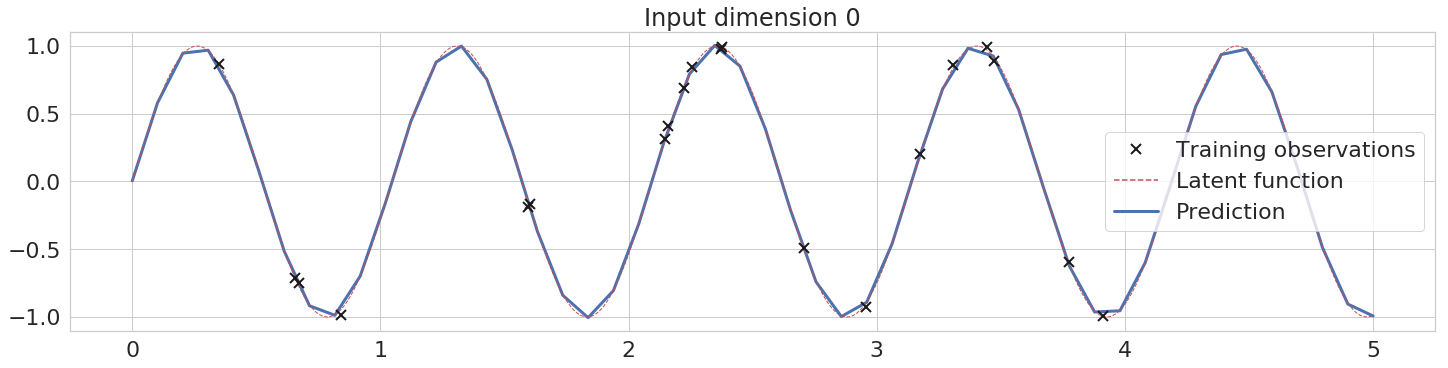

In [44]:
#sm.set_prediction_range(0, [0.0, 0.0], [5.0, 5.0], n=10)
sm.set_prediction_range(0, 0.0, 5.0, n=50)
sm.predict()
mogptk.plot(sm)

## MOSM

In [45]:
mosm = mogptk.MOSM(data, Q=3)
display(mosm.get_params())

[{'magnitude': array([-1.29836867]),
  'mean': array([[-0.36710666]]),
  'variance': array([[0.56912843]]),
  'delay': array([[0.]]),
  'phase': array([0.]),
  'noise': array([0.20460259])},
 {'magnitude': array([0.43769857]),
  'mean': array([[-0.39451432]]),
  'variance': array([[0.99417971]]),
  'delay': array([[0.]]),
  'phase': array([0.]),
  'noise': array([0.32801829])},
 {'magnitude': array([0.36498691]),
  'mean': array([[0.62339356]]),
  'variance': array([[0.16047922]]),
  'delay': array([[0.]]),
  'phase': array([0.]),
  'noise': array([0.67758436])}]

In [47]:
mosm.init_params()
display(mosm.get_params())

3 1 (3,) (3, 1) (1, 3)
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -37.813128
  Number of iterations: 69
  Number of functions evaluations: 92


[{'magnitude': array([1.e-06]),
  'mean': array([[25.96874044]]),
  'variance': array([[1.e-06]]),
  'delay': array([[0.]]),
  'phase': array([0.]),
  'noise': array([0.20460259])},
 {'magnitude': array([1.e-06]),
  'mean': array([[6.28323427e-06]]),
  'variance': array([[65.31966375]]),
  'delay': array([[0.]]),
  'phase': array([0.]),
  'noise': array([0.32801829])},
 {'magnitude': array([0.50581332]),
  'mean': array([[6.00023498]]),
  'variance': array([[1.e-06]]),
  'delay': array([[0.]]),
  'phase': array([0.]),
  'noise': array([0.67758436])}]

In [48]:
mosm.train()
display(mosm.get_params())

Building...


Optimizing...
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: -37.755106
  Number of iterations: 81
  Number of functions evaluations: 116
Done


[{'magnitude': array([-4.06092252e-06]),
  'mean': array([[25.96946987]]),
  'variance': array([[1.e-06]]),
  'delay': array([[0.]]),
  'phase': array([0.]),
  'noise': array([1.e-06])},
 {'magnitude': array([-3.79778968e-09]),
  'mean': array([[2.00832413e-06]]),
  'variance': array([[64.84655512]]),
  'delay': array([[0.]]),
  'phase': array([0.]),
  'noise': array([1.00000048e-06])},
 {'magnitude': array([14.14205776]),
  'mean': array([[6.0002664]]),
  'variance': array([[1.e-06]]),
  'delay': array([[0.]]),
  'phase': array([0.]),
  'noise': array([1.00000005e-06])}]

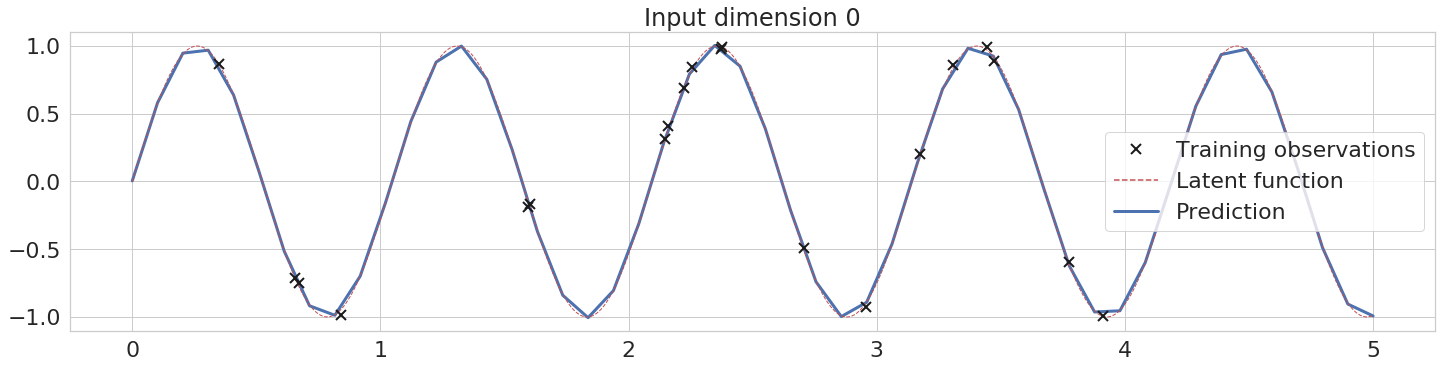

In [50]:
mosm.set_prediction_range(0, 0.0, 5.0, n=50)
mosm.predict()
mogptk.plot(mosm)

## SM-LMC

In [51]:
smlmc = mogptk.SM_LMC(data, Q=3, Rq=1)
display(smlmc.get_params())

[{'constant': array([[1.57169176]]),
  'mean': array([0.02655151]),
  'variance': array([0.3697258])},
 {'constant': array([[-0.88282553]]),
  'mean': array([0.25519792]),
  'variance': array([0.67495928])},
 {'constant': array([[-0.05101081]]),
  'mean': array([0.3758524]),
  'variance': array([0.80840681])}]

In [53]:
smlmc.init_params()
display(smlmc.get_params())

3 1 (3,) (3, 1) (1, 3)
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -45.928679
  Number of iterations: 78
  Number of functions evaluations: 217
[{'weight': array([0.24796938]), 'mean': array([[6.28318531e-06]]), 'scale': array([[1.e-06]])}, {'weight': array([1.e-06]), 'mean': array([[11.91814659]]), 'scale': array([[1.25227839e-06]])}, {'weight': array([0.1283494]), 'mean': array([[6.00017302]]), 'scale': array([[1.e-06]])}]


[{'constant': array([[1.57169176]]),
  'mean': array([6.28318531e-06]),
  'variance': array([1.e-06])},
 {'constant': array([[-0.88282553]]),
  'mean': array([6.00017302]),
  'variance': array([1.e-06])},
 {'constant': array([[-0.05101081]]),
  'mean': array([11.91814659]),
  'variance': array([1.25227839e-06])}]

In [54]:
smlmc.train()
display(smlmc.get_params())

Building...


Optimizing...
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: -38.570901
  Number of iterations: 56
  Number of functions evaluations: 85
Done


[{'constant': array([[5.85605299e-07]]),
  'mean': array([6.28318383e-06]),
  'variance': array([1.e-06])},
 {'constant': array([[-0.70891406]]),
  'mean': array([5.99802724]),
  'variance': array([1.e-06])},
 {'constant': array([[-0.00932004]]),
  'mean': array([11.92115828]),
  'variance': array([1.25137807e-06])}]

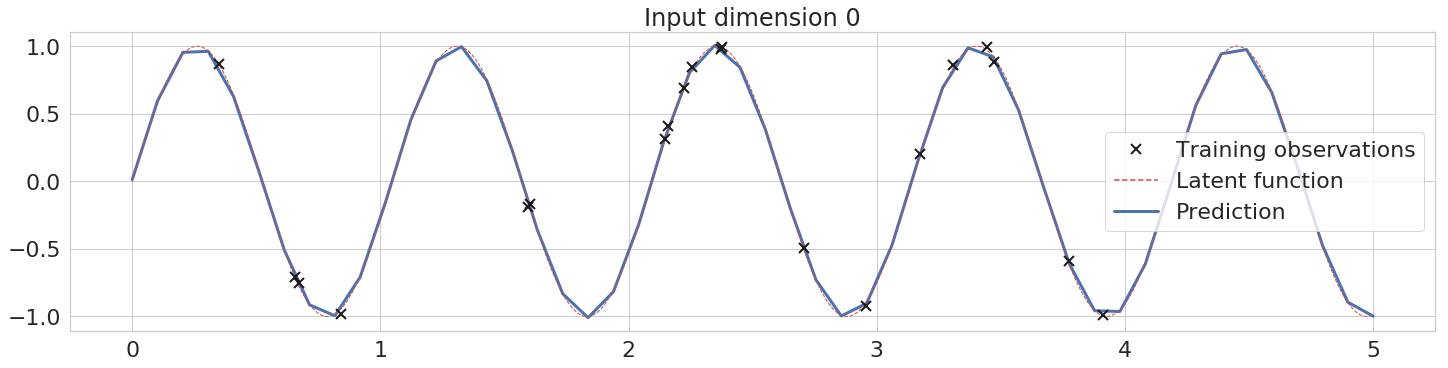

In [55]:
smlmc.set_prediction_range(0, 0.0, 5.0, n=50)
smlmc.predict()
mogptk.plot(smlmc)

## CSM

In [60]:
csm = mogptk.CSM(data, Q=3, Rq=1)
display(csm.get_params())

[{'constant': array([[0.06571818]]),
  'mean': array([0.81088167]),
  'variance': array([0.60166753]),
  'phase': array([[0.]])},
 {'constant': array([[0.16704252]]),
  'mean': array([0.66209932]),
  'variance': array([0.37475324]),
  'phase': array([[0.]])},
 {'constant': array([[0.72371032]]),
  'mean': array([0.22726328]),
  'variance': array([0.07540534]),
  'phase': array([[0.]])}]

In [57]:
csm.init_params()
display(csm.get_params())

3 1 (3,) (3, 1) (1, 3)
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -45.818376
  Number of iterations: 48
  Number of functions evaluations: 59
[{'weight': array([1.e-06]), 'mean': array([[0.10103338]]), 'scale': array([[64.87749518]])}, {'weight': array([0.12829092]), 'mean': array([[6.00034268]]), 'scale': array([[1.e-06]])}, {'weight': array([0.24810258]), 'mean': array([[6.28318531e-06]]), 'scale': array([[1.e-06]])}]


[{'constant': array([[0.76767152]]),
  'mean': array([6.28318531e-06]),
  'variance': array([1.e-06]),
  'phase': array([[0.]])},
 {'constant': array([[0.57817985]]),
  'mean': array([6.00034268]),
  'variance': array([1.e-06]),
  'phase': array([[0.]])},
 {'constant': array([[0.55481939]]),
  'mean': array([0.10103338]),
  'variance': array([64.87749518]),
  'phase': array([[0.]])}]

In [61]:
csm.train()
display(csm.get_params())

Building...


Optimizing...
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: -37.788436
  Number of iterations: 53
  Number of functions evaluations: 80
Done


[{'constant': array([[0.50129947]]),
  'mean': array([6.00026169]),
  'variance': array([1.e-06]),
  'phase': array([[1.e-06]])},
 {'constant': array([[1.00000001e-06]]),
  'mean': array([5.99973868]),
  'variance': array([2.18240942e-06]),
  'phase': array([[1.e-06]])},
 {'constant': array([[1.e-06]]),
  'mean': array([7.62843253e-06]),
  'variance': array([0.00018533]),
  'phase': array([[1.e-06]])}]

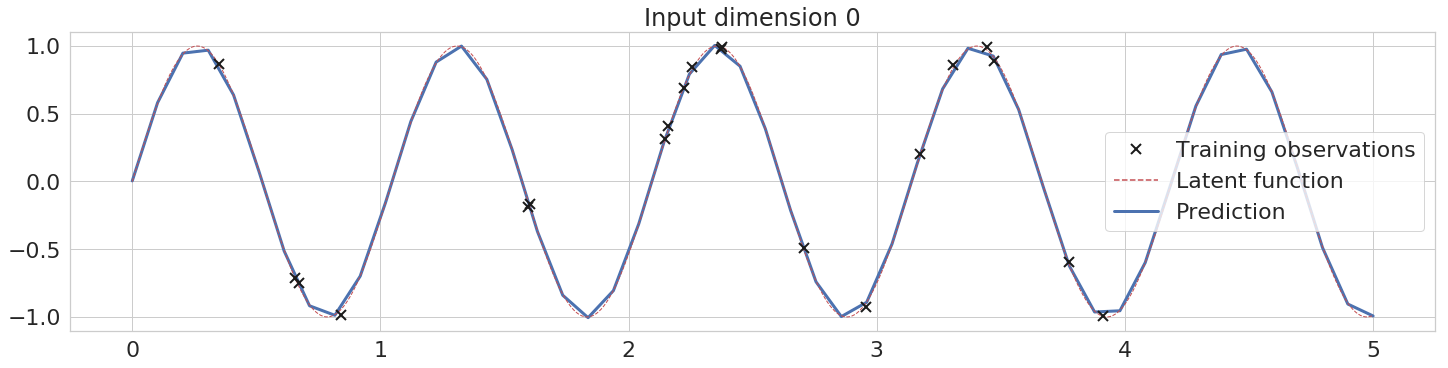

In [62]:
csm.set_prediction_range(0, 0.0, 5.0, n=50)
csm.predict()
mogptk.plot(csm)

## CG

In [63]:
cg = mogptk.CG(data, Q=3)
display(cg.get_params())

[{'constant': array([0.93224529]), 'variance': array([[0.05500915]])},
 {'constant': array([0.96049565]), 'variance': array([[0.64529045]])},
 {'constant': array([0.13310009]), 'variance': array([[0.22130726]])}]

In [64]:
cg.init_params()
display(cg.get_params())

3 1 (3,) (3, 1) (1, 3)
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -37.815088
  Number of iterations: 83
  Number of functions evaluations: 135


[{'constant': array([0.93224529]), 'variance': array([[1.00041554e-06]])},
 {'constant': array([0.96049565]), 'variance': array([[1.00008117e-06]])},
 {'constant': array([0.13310009]), 'variance': array([[1.e-06]])}]

In [65]:
cg.train()
display(cg.get_params())

Building...


Optimizing...
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 22.623634
  Number of iterations: 26
  Number of functions evaluations: 28
Done


[{'constant': array([8.22460741e-05]), 'variance': array([[1.00041554e-06]])},
 {'constant': array([5.82462001e-05]), 'variance': array([[1.00008117e-06]])},
 {'constant': array([0.00054375]), 'variance': array([[1.e-06]])}]

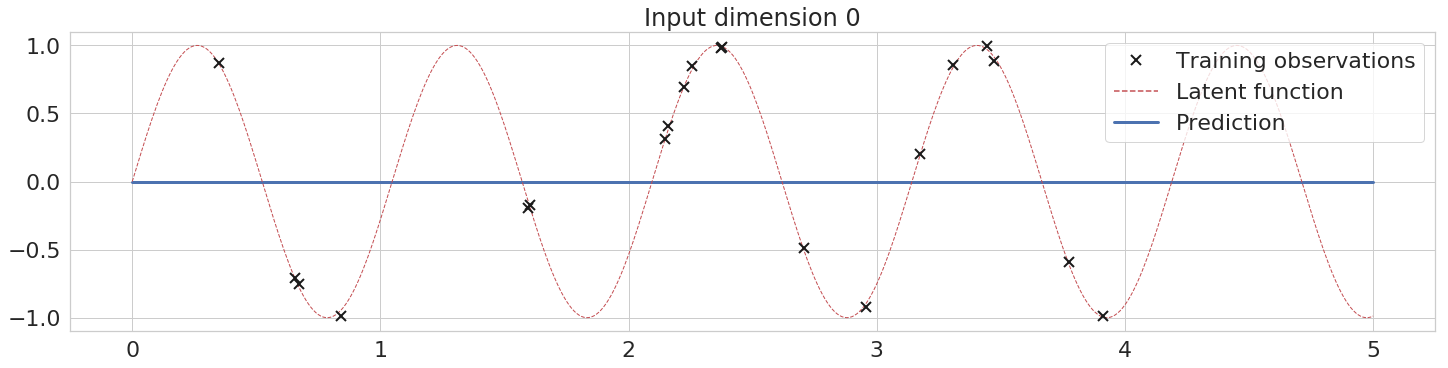

In [67]:
cg.set_prediction_range(0, 0.0, 5.0, n=50)
cg.predict()
mogptk.plot(cg)